In [99]:
# pacotes
import pandas as pd
import numpy as np
import os
import openpyxl
from openpyxl import load_workbook
import seaborn as sn
from itertools import permutations, product
import matplotlib.pyplot as mplt
import scipy.stats as stats
from tabulate import tabulate
from scipy.stats import chi2_contingency 
import statsmodels.api as sm
import statsmodels.tools as smt
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.svm import SVC

In [100]:
# setar diretorio dos cadernos (codigo caso puxe os arquivos com todas as colunas originais do ibge)
diretorio = r'C:\Users\Computadores Gamer\OneDrive\Área de Trabalho\dados gradilene\dados'
diretorio = diretorio.replace('\\', '/')

os.chdir(diretorio)
os.getcwd()

'C:\\Users\\Computadores Gamer\\OneDrive\\Área de Trabalho\\dados gradilene\\dados'

In [101]:
#### Cadernos IBGE

#### DOMICILIO
# largura do txt
larguras = [2,4,1,9,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,14,14,1]

# nome das colunas
colunas = ["UF", "ESTRATO_POF", "TIPO_SITUACAO_REG",
            "COD_UPA", "NUM_DOM", "V0201", "V0202",
            "V0203", "V0204", "V0205", "V0206", "V0207",
            "V0208", "V0209", "V02101", "V02102",
            "V02103", "V02104", "V02105", "V02111",
            "V02112", "V02113", "V0212", "V0213",
            "V02141", "V02142", "V0215", "V02161",
            "V02162", "V02163", "V02164", "V0217",
            "V0219", "V0220", "V0221", "PESO",
            "PESO_FINAL", "V6199"]

# leitura dos dados
DOMICILIO = pd.read_fwf(
    os.path.join(diretorio, "DOMICILIO.txt"), 
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)

##### CONDICOES_VIDA
# largura do txt
larguras = [2,4,1,9,2,1,2,1,6,5,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,14,14,10]

# nome das colunas
colunas = ["UF", "ESTRATO_POF", "TIPO_SITUACAO_REG",
            "COD_UPA", "NUM_DOM", "NUM_UC", "COD_INFORMANTE",
            "V6101", "V6102", "V6103", "V61041", "V61042",
            "V61043", "V61044", "V61045", "V61046",
            "V61051", "V61052", "V61053", "V61054",
            "V61055", "V61056", "V61057", "V61058",
            "V61061", "V61062", "V61063", "V61064",
            "V61065", "V61066", "V61067", "V61068",
            "V61069", "V610610", "V610611", "V61071",
            "V61072", "V61073", "V6108", "V6109",
            "V6110", "V6111", "V6112", "V6113", "V6114",
            "V6115", "V6116", "V6117", "V6118", "V6119",
            "V6120", "V6121", "PESO", "PESO_FINAL",
            "RENDA_TOTAL"]

# leitura dos dados
CONDICOES_VIDA = pd.read_fwf(
    os.path.join(diretorio, "CONDICOES_VIDA.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)


##### MORADOR_QUALI_VIDA
# largura do txt
larguras = [2,4,1,9,2,1,2,20,20,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,2,20,20,14,14]

# nome das colunas
colunas = ["UF","ESTRATO_POF","TIPO_SITUACAO_REG","COD_UPA",
            "NUM_DOM","NUM_UC","COD_INFORMANTE","CONTAGEM_PONDERADA",
            "FUNCAO_PERDA","V201","V202","V204","V205","V206",
            "V207","V208","V209","V210","V211","V212","V214","V215",
            "V216","V217","V301","V302","V303","V304","V305","V306",
            "V307","V308","V401","V402","V403","V501","V502","V503",
            "V504","V505","V506","V601","V602","V603","V604","V605",
            "V606","V607","V608","V609","V610","V611","V701","V702",
            "V703","V704","V801","V802","V901","V902","GRANDE_REGIAO",
            "C1","C2","C3","C4","C5","C6","C7","RENDA_DISP_PC",
            "RENDA_DISP_PC_SS","PESO","PESO_FINAL"]

# leitura dos dados
MORADOR_QUALI_VIDA = pd.read_fwf(
    os.path.join(diretorio, "MORADOR_QUALI_VIDA.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)


#### MORADOR
# largura do txt
larguras = [2,4,1,9,2,1,2,2,1,2,2,4,3,1,1,
            1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,2,1,1,2,1,1,2,1,1,1,
            2,1,2,14,14,10,1,20,20,20,20]

# nome das colunas
colunas = ["UF", "ESTRATO_POF", "TIPO_SITUACAO_REG",
            "COD_UPA", "NUM_DOM", "NUM_UC", "COD_INFORMANTE",
            "V0306", "V0401", "V04021", "V04022", "V04023",
            "V0403", "V0404", "V0405", "V0406", "V0407",
            "V0408", "V0409", "V0410", "V0411", "V0412",
            "V0413", "V0414", "V0415", "V0416",
            "V041711", "V041712", "V041721", "V041722",
            "V041731", "V041732", "V041741", "V041742",
            "V0418", "V0419", "V0420", "V0421", "V0422",
            "V0423", "V0424", "V0425", "V0426", "V0427",
            "V0428", "V0429", "V0430", "ANOS_ESTUDO",
            "PESO", "PESO_FINAL", "RENDA_TOTAL",
            "NIVEL_INSTRUCAO", "RENDA_DISP_PC","RENDA_MONET_PC",
            "RENDA_NAO_MONET_PC","DEDUCAO_PC" ]

# leitura dos dados
MORADOR = pd.read_fwf(
    os.path.join(diretorio, "MORADOR.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)





In [173]:
# #### Merges 
# pd.set_option('display.max_columns', 100)
bigdata = pd.merge(DOMICILIO, MORADOR, on = ['UF', 'ESTRATO_POF',"TIPO_SITUACAO_REG","COD_UPA", "NUM_DOM"], how='left')
bigdata2 = pd.merge(CONDICOES_VIDA, bigdata, on = ['UF', 'ESTRATO_POF',"TIPO_SITUACAO_REG","COD_UPA", "NUM_DOM"], how = 'right')
base = pd.merge(MORADOR_QUALI_VIDA, bigdata2, on = ['UF', 'ESTRATO_POF',"TIPO_SITUACAO_REG","COD_UPA", "NUM_DOM"],how = 'right')


# removendo colunas duplicadas, ou seja, com sufixo '_x' e '_y'
# '$' indica trecho no final da palavra
# colunas_del_x = base.filter(regex=f'_x$').columns
# base = base.drop(colunas_del_x, axis=1)

# colunas_del_y = base.filter(regex=f'_y$').columns
# base = base.drop(colunas_del_y, axis=1)

C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_22124\1938701892.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'PESO_y', 'PESO_FINAL_y'} in the result is deprecated and will raise a MergeError in a future version.
  base = pd.merge(MORADOR_QUALI_VIDA, bigdata2, on = ['UF', 'ESTRATO_POF',"TIPO_SITUACAO_REG","COD_UPA", "NUM_DOM"],how = 'right')


In [174]:
# verificando 'na' nas colunas que serão utilizadas no decorrer do código
# esse código é mais performático
# passou de 693k linhas para 682k linhas
base = base[['UF', 'ESTRATO_POF','TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM','RENDA_MONET_PC','V6199','V6101','V61041','V0212','V0213','V0220', 'C1','C2','C3','C4','GRANDE_REGIAO']]

colunas_na = base.columns[base.isna().any()].tolist()
print(colunas_na)

base = base.dropna(subset=['RENDA_MONET_PC','V0212'])



['RENDA_MONET_PC', 'V0212']


In [175]:
# Criação variáveis dependentes - parte 1

#rdpc
# var_depend1
# MORADOR['RENDA_MONET_PC']
# menor ou igual a 1/4 de SM = pobre
# acima de 1/4 de SM = não pobre
# SM (2017) = 937 
def get_rdpc(z):
    if z <= 937/4:
        return 1
    return 0
base['rdpc'] = base['RENDA_MONET_PC'].apply(lambda z: get_rdpc(z))

# seg_alimentar
# var_depend2 
# DOMICILIO['V6199']
# 1 – Segurança = não pobre
# 2 – Insegurança leve = pobre
# 3 – Insegurança moderada = pobre
# 4 – Insegurança grave = pobre
def get_seg_alimentar(z):
    if z == 1:
        return 0
    return 1
base['seg_alimentar'] = base['V6199'].apply( lambda z: get_seg_alimentar(z))


# subjetividade 1
# var_depend3.1_inicial
# CONDICOES_VIDA['V6101']
# 1 – Muita dificuldade = pobre
# 2 – Dificuldade = pobre
# 3 – Alguma dificuldade = não pobre
# 4 – Alguma facilidade = não pobre
# 5 – Facilidade = não pobre
# 6 – Muita facilidade = não pobre
def get_subjetividade_i(z):
    if z == 1 or z==2:
        return 1
    return 0
base['var_depend3.1_inicial'] = base['V6101'].apply(lambda z: get_subjetividade_i(z))


# subjetividade 2
# var_depend3.2_inicial
# CONDICOES_VIDA['V61041']
# 1 - Bom = não pobre
# 2 - Satisfatório = não pobre
# 3 - Ruim = pobre
def get_subjetividade_i2(z):
    if z == 3:
        return 1
    return 0
base['var_depend3.2_inicial'] = base['V61041'].apply(lambda z: get_subjetividade_i2(z))


# serv_essenciais1
# var_depend4.1_inicial
# DOMICILIO['V0212']
# 1 – Rede geral, rede pluvial ou fossa ligada à rede = não pobre
# 2 – Fossa não ligada à rede = pobre
# 3 – Vala = pobre
# 4 – Rio, lago ou mar = pobre
# 5 – Outra forma = pobre
def get_serv_essenciais1(z):
    if z == 1:
        return 0
    return 1
base['var_depend4.1_inicial'] = base['V0212'].apply(lambda z: get_serv_essenciais1(z))


# serv_essenciais2
# var_depend4.2_inicial
# DOMICILIO['V0213']
# 1 – Coletado diretamente por serviço de limpeza = não pobre
# 2 – Coletado em caçamba de serviço de limpeza = não pobre
# 3 – Queimado (na propriedade) = pobre
# 4 – Enterrado (na propriedade) = pobre
# 5 – Jogado em terreno baldio ou logradouro = pobre
# 6 – Outro destino = pobre
def get_serv_essenciais2(z):
    if z == 1 or z==2:
        return 0
    return 1    
base['var_depend4.2_inicial'] = base['V0213'].apply(lambda z: get_serv_essenciais2(z))



# serv_essenciais3
# var_depend4.3_inicial
# DOMICILIO['V0220']
# 1 – Sim = não pobre
# 2 – Não = pobre
def get_serv_essenciais3(z):
    if z == 1:
        return 0
    return 1    
base['var_depend4.3_inicial'] = base['V0220'].apply(lambda z: get_serv_essenciais3(z))




In [176]:
#### Criação váriaveis dependentes - parte 2

# score variavel dependente do grupo 3
# 3
# Pontuação:
# 0 - não pobre
# 1 - pobre
# 2 - pobre

# gerando permutações 3
lista = ['não pobre', 'pobre']
permutas_3 = []

for i in product(lista, repeat=2):
    permutas_3.append(i)
print(permutas_3)

# [('não pobre', 'não pobre') = 0
# ('não pobre', 'pobre') = 1
# ('pobre', 'não pobre') = 1
# ('pobre', 'pobre')] = 2

def get_subjetividade_principal(z,w):
    if z == 0  and w == 0:
        return 0
    return 1    
base['subjetividade'] = base.apply(lambda row: get_subjetividade_principal(row['var_depend3.1_inicial'], row['var_depend3.2_inicial']), axis=1)


# score variavel dependente do grupo 4
# Pontuação:
# 0 - não pobre
# 1 - não pobre
# 2 - pobre
# 3 - pobre


# gerando permutações 4    
lista = ['não pobre', 'pobre']
permutas_4 = []

for i in product(lista, repeat=3):
    permutas_4.append(i)
print(permutas_4)
    
# ('não pobre', 'não pobre', 'não pobre') = não pobre
# ('não pobre', 'não pobre', 'pobre') = não pobre
# ('não pobre', 'pobre', 'não pobre') = não pobre
# ('não pobre', 'pobre', 'pobre') = pobre
# ('pobre', 'não pobre', 'não pobre') = não pobre
# ('pobre', 'não pobre', 'pobre') = pobre
# ('pobre', 'pobre', 'não pobre') = pobre
# ('pobre', 'pobre', 'pobre') = pobre

def get_serv_essenciais_principal(z,w,p):
    if z == 0  and w == 0 and p==0:
        return 0
    elif z == 0  and w == 0 and p==1:
        return 0
    elif z == 0  and w == 1 and p==0:
        return 0
    elif z == 1  and w == 0 and p==0:
        return 0
    else:
        return 1       
base['serv_essenciais'] = base.apply(lambda row: get_serv_essenciais_principal(row['var_depend4.1_inicial'], row['var_depend4.2_inicial'],row['var_depend4.3_inicial'] ), axis=1)




[('não pobre', 'não pobre'), ('não pobre', 'pobre'), ('pobre', 'não pobre'), ('pobre', 'pobre')]
[('não pobre', 'não pobre', 'não pobre'), ('não pobre', 'não pobre', 'pobre'), ('não pobre', 'pobre', 'não pobre'), ('não pobre', 'pobre', 'pobre'), ('pobre', 'não pobre', 'não pobre'), ('pobre', 'não pobre', 'pobre'), ('pobre', 'pobre', 'não pobre'), ('pobre', 'pobre', 'pobre')]


In [169]:
# # verificacao NAs nas variaveis que participam do processo de criacao das variaveis dependentes 1,2,3,4
var = ['rdpc','seg_alimentar','var_depend3.1_inicial','var_depend3.2_inicial','subjetividade','var_depend4.1_inicial','var_depend4.2_inicial','serv_essenciais' ]
for i in var:
    j = base[i].unique()
    print(f'{i}:', j)
    
    
# # deletando linhas que possuem 'nan' na variavel dependente
# # linhas antes da remoção = 693760
# # linhas depois da remoção = 682767
# base = base.dropna(subset = ['serv_essenciais'])




rdpc: [0 1]
seg_alimentar: [0 1]
var_depend3.1_inicial: [0 1]
var_depend3.2_inicial: [0 1]
subjetividade: [0 1]
var_depend4.1_inicial: [1 0]
var_depend4.2_inicial: [0 1]
serv_essenciais: [0 1]


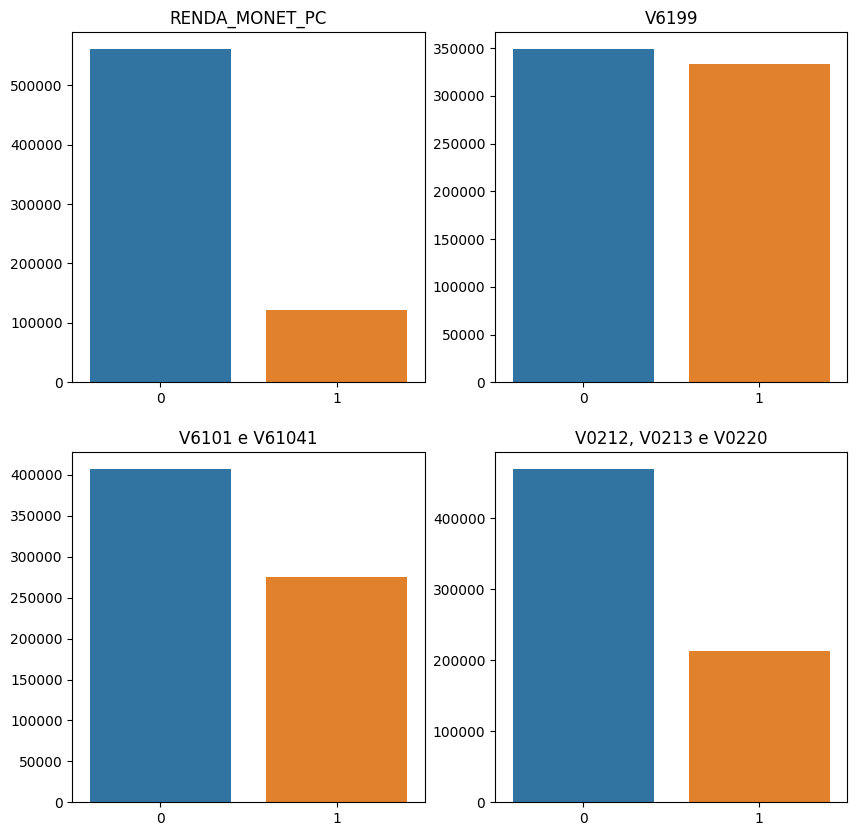

In [170]:
# grid das 4 variaveis
# plano
fig, eixos = mplt.subplots (2, 2, figsize=(10,10) )

# grafico1 = sn.countplot(MORADOR, x = 'var_depend1')
sn.countplot(base, x='rdpc', ax=eixos[0,0])
eixos[0,0].set_title('RENDA_MONET_PC')
eixos[0,0].set_xlabel('')
eixos[0,0].set_ylabel('')

# grafico2 = sn.countplot(DOMICILIO, x = 'var_depend2')
sn.countplot(base, x = 'seg_alimentar', ax=eixos[0,1])
eixos[0,1].set_title('V6199')
eixos[0,1].set_xlabel('')
eixos[0,1].set_ylabel('')

# grafico3 = sn.countplot(CONDICOES_VIDA, x = 'var_depend3')
sn.countplot(base, x = 'subjetividade', ax= eixos[1,0])
eixos[1,0].set_title('V6101 e V61041')
eixos[1,0].set_xlabel('')
eixos[1,0].set_ylabel('')

# grafico4 = sn.countplot(DOMICILIO, x = 'var_depend4')
sn.countplot(base, x = 'serv_essenciais', ax= eixos[1,1])
eixos[1,1].set_title('V0212, V0213 e V0220')
eixos[1,1].set_xlabel('')
eixos[1,1].set_ylabel('')

mplt.show()

In [177]:
# Criação das dummies
# C4 - Nível de Instrução da pessoa (perfil do chefe)
    # 1 – Sem instrução
    # 2 – Ensino Fundamental Incompleto
    # 3 – Ensino Fundamental Completo 
    # 4 – Ensino Médio Incompleto
    # 5 – Ensino Médio Completo 
    # 6 – Ensino Superior Incompleto
    # 7 – Ensino Superior Completo - dummy

# C3 - Sexo (PERFIL DO CHEFE)
    # 1- Masculino - dummy
    # 2- Feminino

# C2 - Cor ou raça (PERFI DO CHEFE)
    # 1 – Brancos - dummy
    # 2 – Pretos e Pardos
    # 3 – Outros

# C1 - IDADE - PERFIL DO CHEFE
    # 1 – Até 24 anos
    # 2 – 25 a 49 anos
    # 3 – 50 a 64 anos - dummy 
    # 4 – 65 anos ou mais - dummy

# GRANDE_REGIAO - REGIÃO (DUMY) - referência é o sudeste
    # 1- Norte
    # 2- Nordeste
    # 3- Sudeste - dummy
    # 4- Sul
    # 5- Centro-Oeste
    
# TIPO_SITUACAO_REG urbano (1) x rural (2)
    # 1 - Urbano - dummy
    # 2 - Rural


# VARIÁVEIS DEPENDENTES
# rdpc
# seg_alimentar
# subjetividade
# serv_essenciais

# base = base[['rdpc','seg_alimentar','subjetividade','serv_essenciais', 'TIPO_SITUACAO_REG','GRANDE_REGIAO', 'C1', 'C2', 'C3', 'C4']]

# # criacao de dummies
base = pd.get_dummies(base, columns=['TIPO_SITUACAO_REG', 'GRANDE_REGIAO','C1', 'C2', 'C3', 'C4'])

# # considerando apenas as dummies de referencia
base = base[['UF','rdpc','seg_alimentar','subjetividade','serv_essenciais', 'C4_7', 'C3_1','C2_1', 'C1_3', 'C1_4', 'GRANDE_REGIAO_3', 'TIPO_SITUACAO_REG_1', 'RENDA_MONET_PC']]



In [109]:
# estatistica descritiva de 'base'




    UF  RENDA_MONET_PC
0   PR      473.559169
1   MA      543.516753
2   AL      611.212346
3   AM      616.980057
4   CE      733.553145
5   TO      736.921041
6   AM      760.421388
7   PB      801.620164
8   BA      807.962405
9   AC      828.021267
10  PE      828.270777
11  RR      858.693254
12  RN      862.830612
13  PI      868.820106
14  RO      901.966406
15  SE      922.366520
16  MG     1076.078915
17  GO     1080.210599
18  ES     1128.001048
19  MT     1149.799871
20  MS     1173.898853
21  RJ     1260.976310
22  PR     1300.680094
23  SC     1436.430667
24  RS     1471.723151
25  SP     1540.291607
26  DF     2337.712966


<Axes: xlabel='UF', ylabel='RENDA_MONET_PC'>

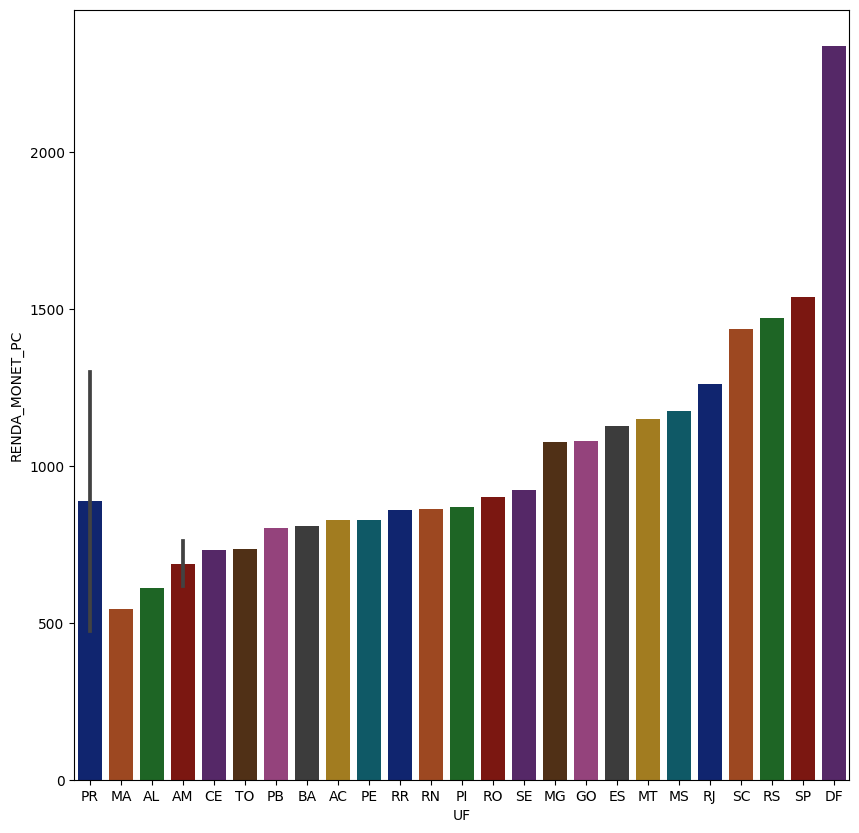

In [179]:
# grafico renda media por estado
media_renda_uf = base.groupby('UF')['RENDA_MONET_PC'].mean().sort_values()
tabela = pd.DataFrame(media_renda_uf).reset_index()


tabela['UF'] = tabela['UF'].map({11 : 'RO',
                               12 : 'AC',
                                13 : 'AM',
                                14 : 'RR',
                                15 : 'PR',
                                16 : 'AM',
                                17 : 'TO',
                                21 : 'MA',
                                22 : 'PI',
                                23 : 'CE',
                                24 : 'RN',
                                25 : 'PB',
                                26 : 'PE',
                                27 : 'AL',
                                28 : 'SE',
                                29 : 'BA',
                                31 : 'MG',
                                32 : 'ES',
                                33 : 'RJ',
                                35 : 'SP',
                                41 : 'PR',
                                42 : 'SC',
                                43 : 'RS',
                                50 : 'MS',
                                51 : 'MT',
                                52 : 'GO',
                                53 : 'DF'}) 
print(tabela)

fig, ax = mplt.subplots(figsize = (10,10))
sn.barplot(y='RENDA_MONET_PC', x='UF', data = tabela, ax=ax, palette='dark')




In [190]:
# fazer associação qui² entre V6199 e as variaveis dependentes
teste = np.array(base[['V6199', 'rdpc']])
chi2, p_valor, _, _ = chi2_contingency(teste)
print(round(chi2,2), p_valor)


# # correlacao de pearson entre variaveis dependentes e RENDA_MONET_PC

# # rdpc e RENDA_MONET_PC
# # Removendo valores infinitos e ausentes
# # valid_indexes1 = np.isfinite(base['rdpc']) & np.isfinite(base['RENDA_MONET_PC'])
# # filtered_rdpc = base['rdpc'][valid_indexes1]
# # filtered_renda1 = base['RENDA_MONET_PC'][valid_indexes1]

# # # Cálculo da correlação de Pearson
# # correlacao1, p_valor1 = stats.pearsonr(filtered_rdpc, filtered_renda1)
# # print('rdpc: ',correlacao1)


# # seg_alimentar e RENDA_MONET_PC
# # Removendo valores infinitos e ausentes
# valid_indexes2 = np.isfinite(base['seg_alimentar']) & np.isfinite(base['RENDA_MONET_PC'])
# filtered_seg_alimentar = base['seg_alimentar'][valid_indexes2]
# filtered_renda2 = base['RENDA_MONET_PC'][valid_indexes2]

# # Cálculo da correlação de Pearson
# correlacao2, p_valor2 = stats.pearsonr(filtered_seg_alimentar, filtered_renda2)
# print('seg_alimentar: ',correlacao2)


# # subjetividade e RENDA_MONET_PC
# # Removendo valores infinitos e ausentes
# valid_indexes3 = np.isfinite(base['subjetividade']) & np.isfinite(base['RENDA_MONET_PC'])
# filtered_subjetividade = base['subjetividade'][valid_indexes3]
# filtered_renda3 = base['RENDA_MONET_PC'][valid_indexes3]

# # Cálculo da correlação de Pearson
# correlacao3, p_valor3 = stats.pearsonr(filtered_subjetividade, filtered_renda3)
# print('subjetividade: ',correlacao3)


# # serv_essenciais e RENDA_MONET_PC
# # Removendo valores infinitos e serv_essenciais
# valid_indexes4 = np.isfinite(base['serv_essenciais']) & np.isfinite(base['RENDA_MONET_PC'])
# filtered_serv_essenciais = base['serv_essenciais'][valid_indexes4]
# filtered_renda4 = base['RENDA_MONET_PC'][valid_indexes4]

# # Cálculo da correlação de Pearson
# correlacao4, p_valor4 = stats.pearsonr(filtered_serv_essenciais, filtered_renda4)
# print('serv_essenciais: ',correlacao4)



336899.2 1.0


In [191]:
# variáveis independentes para MQO
var_x = base[['C4_7', 'C3_1','C2_1', 'C1_3', 'C1_4', 'GRANDE_REGIAO_3', 'TIPO_SITUACAO_REG_1']]

In [192]:
# MQO - rdpc
# https://nathaliatito.medium.com/scikit-learn-ou-statsmodels-avaliando-meu-modelo-de-regressão-f4c04b361fa7

# rdpc
var_y = base[['rdpc']]
var_x = sm.add_constant(var_x)
modelo = sm.OLS(var_y, var_x ).fit()
print(modelo.summary())# Teste t de significância individual = H0 indica irrelevância da variavel, portanto :. p_valor < 0.05 aceita H1 e mantém a variavel


# teste homocedasticidade
teste_homo_rdpc = sms.het_goldfeldquandt(modelo.resid, modelo.model.exog)  # exog indica variaveis exógenas, ou seja, faz uma matriz das variaveis independentes do modelo
print(teste_homo_rdpc)

# vif - rdpc
# teste de multicolinearidade, usando VIF (Variance Inflation Factor)
# caso o valor seja maior que 10, indica multicolinearidade, é preciso excluir essas variáveis
vif= [ variance_inflation_factor(var_x.values, i ) for i in range(var_x.shape[1])]
tabela_vif = pd.DataFrame({'vif':vif[1:]}, index = var_x.columns.drop('const'))
print(tabela_vif)



                            OLS Regression Results                            
Dep. Variable:                   rdpc   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     8817.
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:55:23   Log-Likelihood:            -2.8342e+05
No. Observations:              682622   AIC:                         5.668e+05
Df Residuals:                  682614   BIC:                         5.669e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4011    

In [141]:
# MQO - seg_alimentar
var_y = base[['seg_alimentar']]
var_x = sm.add_constant(var_x)
modelo = sm.OLS(var_y, var_x ).fit()
print(modelo.summary()) # Teste t de significância individual = H0 indica irrelevância da variavel, portanto :. p_valor < 0.05 aceita H1 e mantém a variavel


# teste homocedasticidade
teste_homo_seg_alimentar = sms.het_goldfeldquandt(modelo.resid, modelo.model.exog)  # exog indica variaveis exógenas, ou seja, faz uma matriz das variaveis independentes do modelo
print(teste_homo_seg_alimentar)

# vif - rdpc
# teste de multicolinearidade, usando VIF (Variance Inflation Factor)
# caso o valor seja maior que 10, indica multicolinearidade, é preciso excluir essas variáveis
vif= [ variance_inflation_factor(var_x.values, i ) for i in range(var_x.shape[1])]
tabela_vif = pd.DataFrame({'vif':vif[1:]}, index = var_x.columns.drop('const'))
print(tabela_vif)

                            OLS Regression Results                            
Dep. Variable:          seg_alimentar   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     8784.
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:24:00   Log-Likelihood:            -4.6583e+05
No. Observations:              682622   AIC:                         9.317e+05
Df Residuals:                  682614   BIC:                         9.318e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7087    

In [142]:
# MQO - subjetividade
var_y = base[['subjetividade']]
var_x = sm.add_constant(var_x)
modelo = sm.OLS(var_y, var_x ).fit()
print(modelo.summary()) # Teste t de significância individual = H0 indica irrelevância da variavel, portanto :. p_valor < 0.05 aceita H1 e mantém a variavel


# teste homocedasticidade
# o primeiro numero precisa ser próximo de 1 para os dados serem homocedásticos
teste_homo_subjetividade = sms.het_goldfeldquandt(modelo.resid, modelo.model.exog)  # exog indica variaveis exógenas, ou seja, faz uma matriz das variaveis independentes do modelo
print(teste_homo_subjetividade)

# vif - rdpc
# teste de multicolinearidade, usando VIF (Variance Inflation Factor)
# caso o valor seja maior que 10, indica multicolinearidade, é preciso excluir essas variáveis
vif= [ variance_inflation_factor(var_x.values, i ) for i in range(var_x.shape[1])]
tabela_vif = pd.DataFrame({'vif':vif[1:]}, index = var_x.columns.drop('const'))
print(tabela_vif)

                            OLS Regression Results                            
Dep. Variable:          subjetividade   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     3916.
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:24:03   Log-Likelihood:            -4.6900e+05
No. Observations:              682622   AIC:                         9.380e+05
Df Residuals:                  682614   BIC:                         9.381e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5090    

In [143]:
# MQO - serv_essenciais
var_y = base[['serv_essenciais']]
var_x = sm.add_constant(var_x)
modelo = sm.OLS(var_y, var_x ).fit()
print(modelo.summary()) # Teste t de significância individual = H0 indica irrelevância da variavel, portanto :. p_valor < 0.05 aceita H1 e mantém a variavel


# teste homocedasticidade
teste_homo_serv_essenciais = sms.het_goldfeldquandt(modelo.resid, modelo.model.exog)  # exog indica variaveis exógenas, ou seja, faz uma matriz das variaveis independentes do modelo
print(teste_homo_subjetividade)

# vif - rdpc
# teste de multicolinearidade, usando VIF (Variance Inflation Factor)
# caso o valor seja maior que 10, indica multicolinearidade, é preciso excluir essas variáveis
vif= [ variance_inflation_factor(var_x.values, i ) for i in range(var_x.shape[1])]
tabela_vif = pd.DataFrame({'vif':vif[1:]}, index = var_x.columns.drop('const'))
print(tabela_vif)

                            OLS Regression Results                            
Dep. Variable:        serv_essenciais   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                 8.646e+04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:24:06   Log-Likelihood:            -2.2715e+05
No. Observations:              682622   AIC:                         4.543e+05
Df Residuals:                  682614   BIC:                         4.544e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.9182    

In [155]:
# regressão logistica - teste rdpc
var_y = base[['rdpc']]
var_y = np.ravel(var_y)
var_x = base[['C4_7', 'C3_1','C2_1', 'C1_3', 'C1_4', 'GRANDE_REGIAO_3', 'TIPO_SITUACAO_REG_1']]

treino_x, teste_x, treino_y, teste_y = train_test_split(var_x, var_y, test_size=0.3, random_state=1237)

modelo = LogisticRegression()
modelo.fit(treino_x, treino_y)
predict_y = modelo.predict(teste_x)

matriz_rdpc = confusion_matrix(teste_y, predict_y)
print(matriz_rdpc)

acuracia = accuracy_score(teste_y, predict_y)
print(acuracia)



[[168376      0]
 [ 36411      0]]
0.8222006279695488


In [146]:
# regressão logistica - teste seg_alimentar
var_y = base[['seg_alimentar']]
var_y = np.ravel(var_y)
var_x = base[['C4_7', 'C3_1','C2_1', 'C1_3', 'C1_4', 'GRANDE_REGIAO_3', 'TIPO_SITUACAO_REG_1']]

treino_x, teste_x, treino_y, teste_y = train_test_split(var_x, var_y, test_size=0.3, random_state=123)

modelo = LogisticRegression()
modelo.fit(treino_x, treino_y)
predict_y = modelo.predict(teste_x)

matriz_rdpc = confusion_matrix(teste_y, predict_y)
print(matriz_rdpc)

acuracia = accuracy_score(teste_y, predict_y)
print(acuracia)


[[58407 46504]
 [30531 69345]]
0.6238286609989891


In [147]:
# regressão logistica - teste subjetividade
var_y = base[['subjetividade']]
var_y = np.ravel(var_y)
var_x = base[['C4_7', 'C3_1','C2_1', 'C1_3', 'C1_4', 'GRANDE_REGIAO_3', 'TIPO_SITUACAO_REG_1']]

treino_x, teste_x, treino_y, teste_y = train_test_split(var_x, var_y, test_size=0.3, random_state=123)

modelo = LogisticRegression()
modelo.fit(treino_x, treino_y)
predict_y = modelo.predict(teste_x)

matriz_rdpc = confusion_matrix(teste_y, predict_y)
print(matriz_rdpc)

acuracia = accuracy_score(teste_y, predict_y)
print(acuracia)

[[101000  21257]
 [ 59298  23232]]
0.6066400699263137


In [148]:
# regressão logistica - teste serv_essenciais
var_y = base[['serv_essenciais']]
var_y = np.ravel(var_y)
var_x = base[['C4_7', 'C3_1','C2_1', 'C1_3', 'C1_4', 'GRANDE_REGIAO_3', 'TIPO_SITUACAO_REG_1']]

treino_x, teste_x, treino_y, teste_y = train_test_split(var_x, var_y, test_size=0.3, random_state=123)

modelo = LogisticRegression()
modelo.fit(treino_x, treino_y)
predict_y = modelo.predict(teste_x)

matriz_rdpc = confusion_matrix(teste_y, predict_y)
print(matriz_rdpc)

acuracia = accuracy_score(teste_y, predict_y)
print(acuracia)

[[134673   5670]
 [ 22578  41866]]
0.862061556641779


In [120]:
# SVC
# modelo = SVC()
# modelo.fit(treino_x, treino_y)


# predict_y = modelo.predict(teste_x)

# matriz_rdpc = confusion_matrix(teste_y, predict_y)
# print(matriz_rdpc)

# acuracia = accuracy_score(teste_y, predict_y)
# print(acuracia)
